In [1]:
import torch
import torch.nn as nn

from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
from torch.optim import Adam, SGD

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [6]:
import os

In [7]:
import cv2

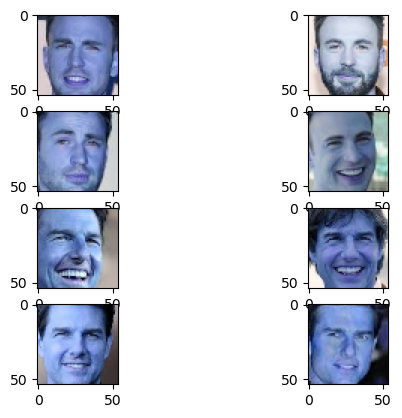

In [8]:
c=0
for img in os.listdir('../Pictures/NewPictures'):
    c=c+1
    imar = cv2.imread('../Pictures/NewPictures/' + img)
    rsimg = cv2.resize(imar, (54,54))
    
    plt.subplot(4,2,c)
    plt.imshow(rsimg)

In [9]:
em = np.zeros((1,54,54,3))
for img in os.listdir('../Pictures/NewPictures'):
    imar = cv2.imread('../Pictures/NewPictures/' + img)
    rsimg = cv2.resize(imar, (54,54))
    newar = rsimg.reshape(1,54,54,3)
    
    em = np.vstack([em, newar])

In [10]:
em.shape

(9, 54, 54, 3)

In [12]:
findata = np.delete(em,0,0)

In [14]:
# findata

In [15]:
xdata = torch.tensor(findata, dtype=torch.float32)

In [16]:
xdata.shape

torch.Size([8, 54, 54, 3])

In [17]:
xdata.dtype

torch.float32

In [18]:
ydata = torch.tensor([0,0,0,0,1,1,1,1])

In [19]:
ydata.dtype

torch.int64

In [20]:
pretrained_vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

In [21]:
pretrained_vgg.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [22]:
pretrained_vgg.classifier[6] = nn.Linear(4096, 2)

In [23]:
# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_vgg.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [24]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = Adam(pretrained_vgg.parameters(), lr=0.001)

In [25]:
xxdt = xdata.reshape(8,3,54,54)

In [26]:
for epoch in range(5):
    pretrained_vgg.train()
    total_loss = 0
    
    images, Y = xxdt.to(device), ydata.to(device)

    optimizer.zero_grad()
    Yp = pretrained_vgg(images)
    loss = criterion(Yp, Y)
    loss.backward()
    optimizer.step()

    print(loss.item())

9.613632202148438
77.26517486572266
50.486106872558594
5.494645595550537
28.59991455078125
